https://santiagof.medium.com/model-interpretability-making-your-model-confess-feature-importance-34993e001d99

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WC-stats.csv')

In [3]:
df.head()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
0,0.423077,0.146923,-0.136154,-0.030000,0.429231,0.037692,0.244615,-0.220000,0.216154,0.270000,-0.076923,-0.097692,-0.020000,-0.224615,0.100769,-0.124615,2
1,0.216923,0.348462,0.031538,0.158462,0.835385,0.626923,0.270000,0.266923,1.143846,0.834615,-0.059231,-0.134615,0.196923,-0.016923,0.033846,0.146923,1
2,0.113846,0.392308,0.599231,0.513846,0.833077,0.405385,0.521538,1.139231,1.109231,0.859231,0.084615,0.103077,0.683846,0.213846,0.353846,0.786923,9
3,0.479231,0.609231,0.227692,0.450769,0.770769,0.042308,0.337692,0.927692,0.506923,1.015385,0.020769,0.381538,0.038462,0.039231,0.022308,0.692308,5
4,0.877692,0.773846,0.428462,0.659231,0.754615,0.335385,0.023077,0.638462,0.493846,0.637692,-0.117692,-0.033846,0.572308,-0.016154,-0.096923,0.890769,5


In [4]:
df.shape

(158, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   goals_z          158 non-null    float64
 1   xg_z             158 non-null    float64
 2   crosses_z        158 non-null    float64
 3   boxtouches_z     158 non-null    float64
 4   passes_z         158 non-null    float64
 5   progpasses_z     158 non-null    float64
 6   takeons_z        158 non-null    float64
 7   progruns_z       158 non-null    float64
 8   tackles_z        158 non-null    float64
 9   interceptions_z  158 non-null    float64
 10  clearances_z     158 non-null    float64
 11  blocks_z         158 non-null    float64
 12  aerials_z        158 non-null    float64
 13  fouls_z          158 non-null    float64
 14  fouled_z         158 non-null    float64
 15  nsxg_z           158 non-null    float64
 16  results          158 non-null    int64  
dtypes: float64(16), 

In [6]:
df.corr()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
goals_z,1.000000,0.593882,0.042906,0.300056,0.257896,0.104536,0.292063,0.220753,0.313448,0.262674,-0.169119,0.080306,0.065206,-0.154157,0.015971,0.370490,-0.642001
xg_z,0.593882,1.000000,0.383316,0.669005,0.379186,0.168393,0.341023,0.439055,0.408050,0.334599,-0.356212,0.137321,0.085119,-0.080857,0.150826,0.679585,-0.315752
crosses_z,0.042906,0.383316,1.000000,0.644555,0.234163,0.285101,0.115226,0.262945,0.193384,0.230263,-0.191263,0.075910,0.264544,0.025607,0.202819,0.666068,0.034878
boxtouches_z,0.300056,0.669005,0.644555,1.000000,0.382181,0.238482,0.202332,0.432240,0.396708,0.337851,-0.420998,0.233539,0.280895,-0.103904,0.143837,0.855952,-0.200537
passes_z,0.257896,0.379186,0.234163,0.382181,1.000000,0.743879,0.398349,0.656938,0.757077,0.724294,-0.118588,0.430210,-0.000897,-0.019146,0.276909,0.520417,-0.178234
progpasses_z,0.104536,0.168393,0.285101,0.238482,0.743879,1.000000,0.180785,0.419958,0.523392,0.523185,-0.010195,0.384167,0.033427,0.164577,0.117262,0.395564,-0.084719
takeons_z,0.292063,0.341023,0.115226,0.202332,0.398349,0.180785,1.000000,0.567979,0.388583,0.377466,-0.075201,0.205780,-0.025027,0.015762,0.369726,0.373965,-0.174466
progruns_z,0.220753,0.439055,0.262945,0.432240,0.656938,0.419958,0.567979,1.000000,0.592725,0.488475,-0.062295,0.358292,0.028458,0.001364,0.301723,0.556932,-0.201809
tackles_z,0.313448,0.408050,0.193384,0.396708,0.757077,0.523392,0.388583,0.592725,1.000000,0.712897,-0.218618,0.325432,0.048009,-0.082459,0.286030,0.498909,-0.237599
interceptions_z,0.262674,0.334599,0.230263,0.337851,0.724294,0.523185,0.377466,0.488475,0.712897,1.000000,-0.099396,0.341119,0.064151,0.023685,0.314982,0.458088,-0.166157


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goals_z,158.0,0.167384,0.285066,-0.410000,-0.051154,0.147308,0.376154,0.881538
xg_z,158.0,0.208661,0.262167,-0.368462,0.010000,0.186538,0.369808,1.015385
crosses_z,158.0,0.119981,0.240348,-0.493846,-0.049231,0.088462,0.275385,0.853846
boxtouches_z,158.0,0.220126,0.277416,-0.459231,0.031731,0.195385,0.403654,1.153077
passes_z,158.0,0.096816,0.370614,-0.781538,-0.170577,0.063462,0.320385,1.410769
progpasses_z,158.0,-0.014874,0.258017,-0.649231,-0.195769,-0.022308,0.130769,0.873846
takeons_z,158.0,0.144537,0.299642,-0.473077,-0.070769,0.126923,0.333077,1.100769
progruns_z,158.0,0.143596,0.367793,-0.568462,-0.086346,0.081154,0.369808,1.432308
tackles_z,158.0,0.109282,0.392577,-0.722308,-0.161346,0.069231,0.341154,1.146154
interceptions_z,158.0,0.088040,0.402717,-0.649231,-0.221923,0.039615,0.346538,1.215385


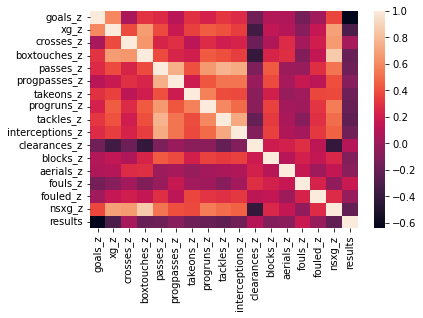

In [8]:
sns.heatmap(df.corr());

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_28043/2528632801.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


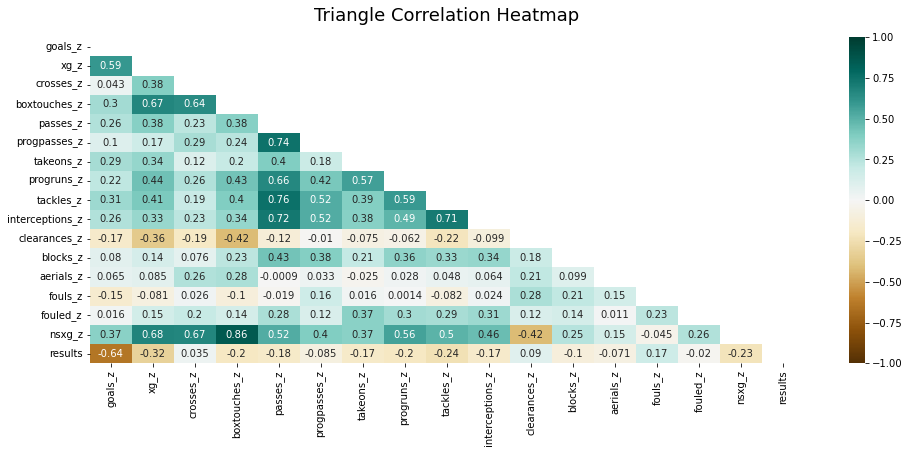

In [9]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

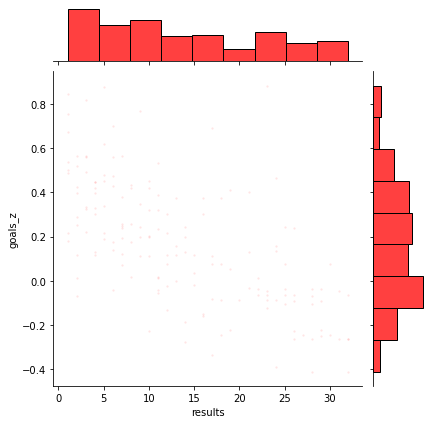

In [10]:
sns.jointplot(x=df['results'],y=df['goals_z'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

In [11]:
y = df['results']


In [12]:
X = df.drop(columns=['results'])

In [13]:
X.head()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,0.423077,0.146923,-0.136154,-0.030000,0.429231,0.037692,0.244615,-0.220000,0.216154,0.270000,-0.076923,-0.097692,-0.020000,-0.224615,0.100769,-0.124615
1,0.216923,0.348462,0.031538,0.158462,0.835385,0.626923,0.270000,0.266923,1.143846,0.834615,-0.059231,-0.134615,0.196923,-0.016923,0.033846,0.146923
2,0.113846,0.392308,0.599231,0.513846,0.833077,0.405385,0.521538,1.139231,1.109231,0.859231,0.084615,0.103077,0.683846,0.213846,0.353846,0.786923
3,0.479231,0.609231,0.227692,0.450769,0.770769,0.042308,0.337692,0.927692,0.506923,1.015385,0.020769,0.381538,0.038462,0.039231,0.022308,0.692308
4,0.877692,0.773846,0.428462,0.659231,0.754615,0.335385,0.023077,0.638462,0.493846,0.637692,-0.117692,-0.033846,0.572308,-0.016154,-0.096923,0.890769


In [14]:
import matplotlib.pyplot as plt
from scipy import stats


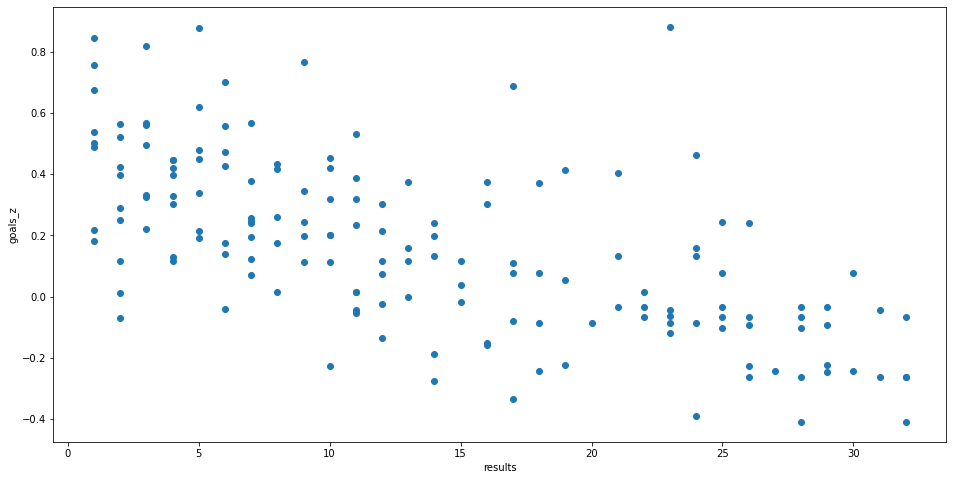

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['results'], df['goals_z'])
ax.set_xlabel('results')
ax.set_ylabel('goals_z')
plt.show()

In [16]:
z = np.abs(stats.zscore(X))
print(z)

      goals_z      xg_z  crosses_z  boxtouches_z  passes_z  progpasses_z  \
0    0.899815  0.236239   1.069072      0.904494  0.899782      0.204381   
1    0.174335  0.534947   0.369148      0.222987  1.999162      2.495333   
2    0.188404  0.702724   2.000320      1.062138  1.992916      1.633983   
3    1.097427  1.532780   0.449570      0.834042  1.824261      0.222326   
4    2.499660  2.162680   1.287553      1.587872  1.780536      1.361820   
..        ...       ...        ...           ...       ...           ...   
153  0.236597  0.752763   0.337197      1.209566  0.741538      1.346866   
154  1.297746  0.144992   0.192718      0.106158  0.715974      0.704822   
155  0.838088  2.208356   2.562030      1.691703  2.106857      2.029746   
156  0.888987  1.724104   1.470561      1.434881  0.962247      0.279151   
157  1.073064  0.955862   0.600316      0.512280  0.866467      1.122556   

     takeons_z  progruns_z  tackles_z  interceptions_z  clearances_z  \
0     0.335057 

<AxesSubplot:>

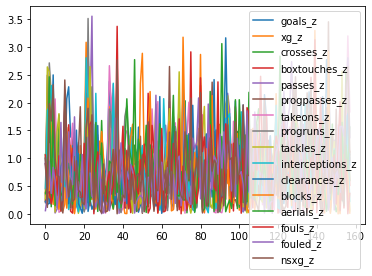

In [17]:
z.plot()

<AxesSubplot:>

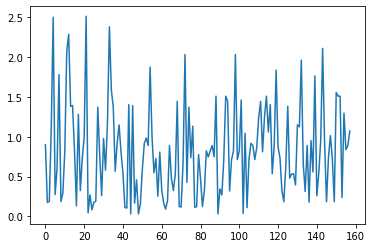

In [18]:
z.goals_z.plot()

In [19]:
z.describe().T

,count,mean,std,min,25%,50%,75%,max
goals_z,158.0,0.820016,0.574160,0.030864,0.321324,0.762024,1.144800,2.513195
xg_z,158.0,0.793722,0.610215,0.003706,0.298787,0.669637,1.217685,3.086926
crosses_z,158.0,0.814118,0.582546,0.019342,0.376372,0.693503,1.114941,3.063049
boxtouches_z,158.0,0.780903,0.626639,0.013453,0.252676,0.672706,1.140025,3.373696
passes_z,158.0,0.778093,0.630146,0.010122,0.277680,0.679825,1.079976,3.556618
progpasses_z,158.0,0.775238,0.633678,0.001984,0.283134,0.647508,1.137496,3.455379
takeons_z,158.0,0.786695,0.619305,0.012613,0.306333,0.654134,1.156061,3.201402
progruns_z,158.0,0.785287,0.621101,0.021663,0.309841,0.625610,1.089637,3.515047
tackles_z,158.0,0.791486,0.613131,0.009960,0.309953,0.673242,1.159188,2.649592
interceptions_z,158.0,0.809724,0.588676,0.002965,0.379836,0.702278,1.143912,2.808247


In [20]:
threshold = 2.7
print(np.where(z > 2.7))

(array([  2,  21,  21,  22,  22,  24,  37,  37,  46,  50,  71,  75,  80,
        91,  93, 121, 127, 139, 139, 145, 146, 146, 156, 156]), array([ 7,  1,  9,  4,  7,  4,  3, 15, 12, 11, 11,  3, 11,  2, 10,  2, 14,
       11, 13, 10,  5, 11,  6, 14]))


In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

goals_z             0.427308
xg_z                0.359808
crosses_z           0.324615
boxtouches_z        0.371923
passes_z            0.490962
progpasses_z        0.326538
takeons_z           0.403846
progruns_z          0.456154
tackles_z           0.502500
interceptions_z     0.568462
clearances_z        0.316538
blocks_z            0.370000
aerials_z           0.371538
fouls_z             0.437885
fouled_z            0.350962
nsxg_z              0.345385
results            16.000000
dtype: float64


In [22]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     goals_z   xg_z  crosses_z  boxtouches_z  passes_z  progpasses_z  \
0      False  False      False         False     False         False   
1      False  False      False         False     False         False   
2      False  False      False         False     False         False   
3      False  False      False         False     False         False   
4      False  False      False         False     False         False   
..       ...    ...        ...           ...       ...           ...   
153    False  False      False         False     False         False   
154    False  False      False         False     False         False   
155    False  False      False         False     False         False   
156    False  False      False         False     False         False   
157    False  False      False         False     False         False   

     takeons_z  progruns_z  tackles_z  interceptions_z  clearances_z  \
0        False       False      False            False         

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [23]:
df.isnull().sum()

goals_z            0
xg_z               0
crosses_z          0
boxtouches_z       0
passes_z           0
progpasses_z       0
takeons_z          0
progruns_z         0
tackles_z          0
interceptions_z    0
clearances_z       0
blocks_z           0
aerials_z          0
fouls_z            0
fouled_z           0
nsxg_z             0
results            0
dtype: int64

In [24]:
df_z = df[(z < 2.7).all(axis=1)]

In [25]:
df_z.shape

(140, 17)

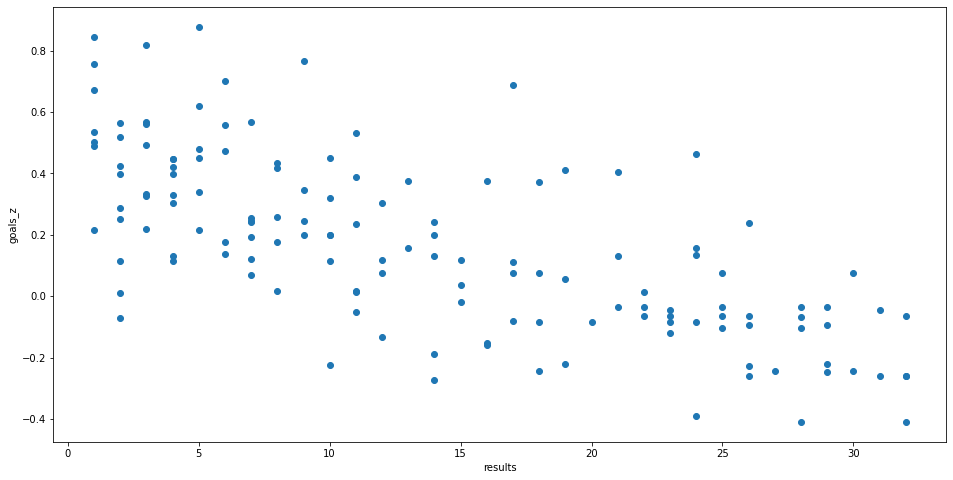

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_z['results'], df_z['goals_z'])
ax.set_xlabel('results')
ax.set_ylabel('goals_z')
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
y = df_z['results']

In [29]:
X = df_z.drop(columns=['results'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=1)

In [43]:
reg = LinearRegression().fit(X_train, y_train)

In [44]:
predictions = reg.predict(X_test)

In [45]:
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error

print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.45878960350087705
RMSE : 6.5489054539688025


# 46%

In [46]:
import eli5
from eli5.sklearn import PermutationImportance

In [47]:
perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are goals_z & passes_z 

Weight,Feature
1.1527 ± 0.8367,goals_z
0.0505 ± 0.0605,progpasses_z
0.0460 ± 0.0300,tackles_z
0.0361 ± 0.0872,xg_z
0.0270 ± 0.0838,boxtouches_z
0.0209 ± 0.0180,progruns_z
0.0179 ± 0.0143,interceptions_z
0.0177 ± 0.0737,nsxg_z
0.0130 ± 0.0250,fouls_z
0.0102 ± 0.0757,passes_z


The previous table shows the feature importance of each of the columns. The weight column represents the importance of the feature measured as the MDA. The +/- sign represents the standard deviation of the importance calculated before. This value tries to measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. Weight’s column then represents the mean of the error accumulated in the multiple shuffles instead of in a single trial.

In [77]:
importances = eli5.explain_weights_df(perm, feature_names=X_test.columns.tolist())

In [78]:
importances

,feature,weight,std
0,goals_z,1.152689,0.418330
1,progpasses_z,0.050477,0.030270
2,tackles_z,0.045979,0.015006
3,xg_z,0.036074,0.043618
4,boxtouches_z,0.027041,0.041924
5,progruns_z,0.020862,0.009003
6,interceptions_z,0.017855,0.007126
7,nsxg_z,0.017745,0.036868
8,fouls_z,0.013005,0.012523
9,passes_z,0.010185,0.037834


<AxesSubplot:xlabel='feature', ylabel='weight'>

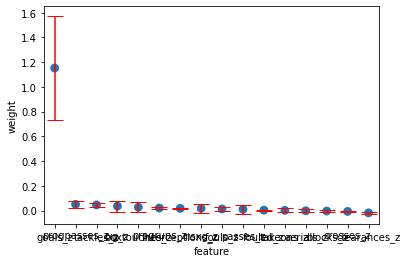

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.errorbar(x=importances['feature'],
    y=importances['weight'],
    yerr=importances['std'],
    ecolor='r', capsize=8, fmt='none',)
sns.pointplot(x='feature', 
    y='weight', 
    data=importances, 
    dodge=True, join=False, ci='none')

This graph is telling us the importance of each of the features in classifying something as present or past. 

## Ridge Regression


In [93]:
from sklearn.linear_model import Ridge

In [94]:
clf = Ridge(alpha=1.0)

In [95]:
clf.fit(X_train, y_train)

Ridge()

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [97]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

6.645452818212983
0.5207879337372383


In [98]:
pred_test_rr= rr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

6.546574410596934
0.4591748160801836


## 46%-57%

# Lasso

In [99]:
from sklearn import linear_model


In [100]:
clf = linear_model.Lasso(alpha=0.1)

In [101]:
clf.fit(X, y)

Lasso(alpha=0.1)

In [102]:
print(clf.coef_)

[-22.12892651   0.           0.          -0.           1.11803102
   0.          -0.          -0.          -0.04202932  -0.
  -0.           0.25686828  -0.           1.08267984  -0.
   0.        ]


In [103]:
print(clf.intercept_)

17.24337558499466


In [104]:
model_lasso = linear_model.Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

6.654226955476154
0.5195216699254779
6.4986296685245195
0.4670674244494648


## 47%-57%

## Elastic Net

In [105]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [106]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [107]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)

In [108]:
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [109]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [110]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

In [111]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 5.176351828568661
MSE: 40.10564374896148
RMSE: 6.332901684769903
R2 Square 0.4939025125678309
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.825735023910361
MSE: 47.612001656327244
RMSE: 6.900145046035427
R2 Square 0.48335167350752983
__________________________________


In [112]:
regr = ElasticNet(random_state=0)

In [68]:
regr.fit(X, y)

ElasticNet(random_state=0)

In [69]:
print(regr.coef_)

[-2.34194886 -0.27265099  0.         -0.         -0.         -0.
 -0.         -0.         -0.2697666  -0.          0.         -0.
 -0.          0.         -0.         -0.        ]


In [70]:
print(regr.intercept_)

14.173917970362385


# Poisson

In [113]:
from sklearn import linear_model


In [116]:
clf = linear_model.PoissonRegressor()
clf.fit(X_train, y_train)




PoissonRegressor()

In [117]:
clf.score(X_train, y_train)

0.37344864683918855

In [118]:
clf.coef_


array([-0.83277969, -0.17815903,  0.08383783, -0.05397004,  0.10033936,
        0.00401256, -0.10217999,  0.05359117, -0.1207388 ,  0.00173662,
        0.01740208,  0.05343762, -0.01784048,  0.11309688,  0.03457517,
       -0.05286843])

In [119]:
clf.intercept_


2.7614764844589703

In [123]:
X_train.head()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
19,0.373846,0.166154,0.297692,0.044615,0.316923,-0.044615,0.379231,0.212308,0.300769,0.247692,-0.024615,-0.263846,0.294615,0.183846,0.386154,0.120000
128,0.015385,0.321538,0.681538,0.588462,0.288462,0.276923,0.149231,0.466923,0.473077,0.370769,-0.127692,0.583077,-0.006154,-0.200769,0.530769,0.897692
17,0.531538,0.284615,-0.023846,0.100769,0.078462,-0.300000,0.070000,0.180769,0.105385,0.073846,0.023846,-0.131538,-0.009231,0.236154,-0.030000,0.053077
96,-0.034615,-0.118462,-0.083077,0.097692,0.191538,0.214615,0.066154,-0.084615,-0.219231,0.169231,0.140769,0.176154,0.094615,0.030769,0.220000,-0.124615
5,0.245385,0.097692,0.549231,0.490000,0.090769,0.071538,-0.473077,-0.150769,0.096923,0.277692,-0.153077,-0.212308,0.033846,-0.145385,-0.036154,0.487692


In [125]:
swiss = df = pd.concat(map(pd.read_csv,['Switzerland.csv', 'Switzerland1.csv']))

In [129]:
swiss.iloc[4]

goals_z             0.241538
xg_z                0.330769
crosses_z           0.522308
boxtouches_z        0.181538
passes_z            0.219231
progpasses_z        0.113077
takeons_z           0.045385
progruns_z          0.286923
tackles_z           0.679231
interceptions_z     0.503077
clearances_z       -0.172308
blocks_z            0.457692
aerials_z          -0.246923
fouls_z            -0.040000
fouled_z            0.116154
nsxg_z              0.186923
results            14.000000
Name: 3, dtype: float64

In [136]:
# clf.predict([.241538, .330769, .522308, .181538, .219231, .113077, .045385,
#             .286923, .679231, .503077, -0.172308, .457692, -0.246923, -0.040000,
#             .116154, 186923])

# Ordinary Least Square

In [137]:
from sklearn import linear_model
reg = linear_model.LinearRegression()


In [140]:
reg.fit(X_train, y_train)

LinearRegression()

In [141]:
reg.coef_

array([-25.79811972,   4.77306203,  -1.58024539,  -6.6893377 ,
         8.50223852,  -3.60909006,  -3.52875252,  -0.79159283,
        -3.0813026 ,  -0.86876513,   1.19619694,   2.99154161,
         1.89192749,   1.4619753 ,  -1.04046835,   6.13568188])